#### Imports

In [27]:
from sklearn.tree import DecisionTreeClassifier
import evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt
from statistics import mean

#### Retrieve Stored Variables
Standard and Factorized Datasets

In [28]:
%store -r data_levels

#### Variable That Removes Class Variable and ID from Dataset

In [29]:
clean = list(set(list(data_levels)) - set(['default_payment_next_month', 'id']))

#### Seperate Both Datasets into Training and Testing Subsets
70/30 split will be used

In [30]:
fctr_x_train, fctr_x_test, fctr_y_train, fctr_y_test = train_test_split(data_levels[clean], 
                                                                    data_levels['default_payment_next_month'], 
                                                                    test_size=0.3, 
                                                                    random_state=11)

#### Instantiate Decision Tree Model Object

In [31]:
model = DecisionTreeClassifier()

#### Train the Model on the Training Data and Use it to Predict Y Values of Test Set
Include the time taken

In [32]:
start = time.time()
model.fit(X = fctr_x_train,
          y = fctr_y_train)
results = confusion_matrix(y_pred = model.predict(fctr_x_test),
                           y_true = fctr_y_test)
end = time.time()
print(f'The model took {round(end - start, 2)} seconds to train and predict.')

The model took 0.35 seconds to train and predict.


#### Display Confusion Matrix

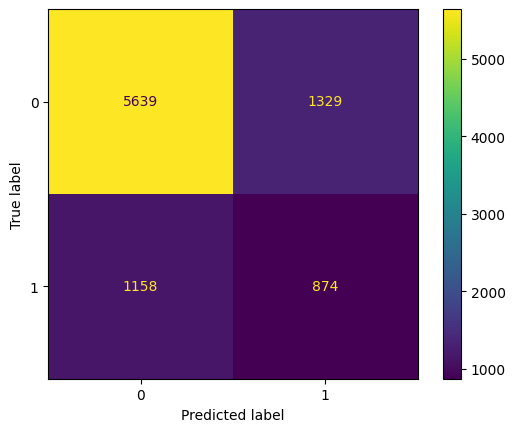

In [33]:
ConfusionMatrixDisplay(results).plot()

#### Evaluate the Model Using Custom Eval Metrics Class

In [34]:
metrics = evaluation.evalMetrics(results)

In [35]:
print(f'The Accuracy of the Model: {round(metrics.accuracy(),3)}')
print(f'The Precision of the Model: {round(metrics.precision(),2)}')
print(f'The Recall of the Model: {round(metrics.recall(),2)}')
print(f'The F-Score of the Model: {round(metrics.fScore(),2)}')
print(f'The Negative Predictive Value  of the Model: {round(metrics.negativePredictiveValue(),2)}')
print(f'The Positive Predicitive Value of the Model: {round(metrics.positivePredictiveValue(),2)}')

The Accuracy of the Model: 0.724
The Precision of the Model: 0.83
The Recall of the Model: 0.81
The F-Score of the Model: 0.82
The Negative Predictive Value  of the Model: 0.4
The Positive Predicitive Value of the Model: 0.83


#### Cross Validate the Model Using Accuracy

In [36]:
start = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=28)
cv_scores = cross_val_score(model, data_levels[clean], data_levels['default_payment_next_month'], scoring='accuracy', cv=cv)
end = time.time()

#### Show Cross Validation Scores, Min and Max

In [37]:
print(cv_scores)
print()
print('Max Cross Validation Score: ', max(cv_scores))
print('Min Cross Validation Score: ', min(cv_scores))

[0.72866667 0.73033333 0.733      0.72966667 0.728      0.72466667
 0.721      0.72333333 0.716      0.70633333 0.71633333 0.702
 0.73866667 0.72666667 0.733      0.72566667 0.725      0.727
 0.73166667 0.73033333 0.70433333 0.72133333 0.71933333 0.721
 0.719      0.71333333 0.73333333 0.72666667 0.71733333 0.72833333]

Max Cross Validation Score:  0.7386666666666667
Min Cross Validation Score:  0.702


#### Evaluate the Results of the Cross-Validation

In [38]:
print(f'Cross Validation took {round(end - start, 2)} seconds and produced an average accuracy of {round(mean(cv_scores),3)}')

Cross Validation took 11.1 seconds and produced an average accuracy of 0.723


#### Analyze Feature Importances and Select the 7 Most Meaningful
Create dict of feature values and their associated label

In [39]:
features = {}
for i in range(len(model.feature_importances_)):
    features[model.feature_importances_[i]] = model.feature_names_in_[i]

Select the 5 best features and return the labels as a list

In [40]:
selected_features = {k: v for k,v in features.items() if k in sorted(features.keys())[::-1][:7]}
selected_features = list(selected_features.values())
selected_features

['pay_amt6', 'limit_bal', 'education', 'pay_2', 'pay_0', 'pay_amt5', 'age']

#### Retrain Model on Selected Features and Evaluate Change in Performance

In [41]:
features_x_train, features_x_test, features_y_train, features_y_test = train_test_split(data_levels[selected_features], 
                                                                    data_levels['default_payment_next_month'], 
                                                                    test_size=0.3, 
                                                                    random_state=14)

#### Reinstantiate Model and Fit/Predict

In [42]:
model = DecisionTreeClassifier()

In [43]:
start = time.time()
model.fit(X = features_x_train,
          y = features_y_train)
results = confusion_matrix(y_pred = model.predict(features_x_test),
                           y_true = features_y_test)
end = time.time()
print(f'The model took {round(end - start, 2)} seconds to train and predict.')

The model took 0.12 seconds to train and predict.


#### Display CF

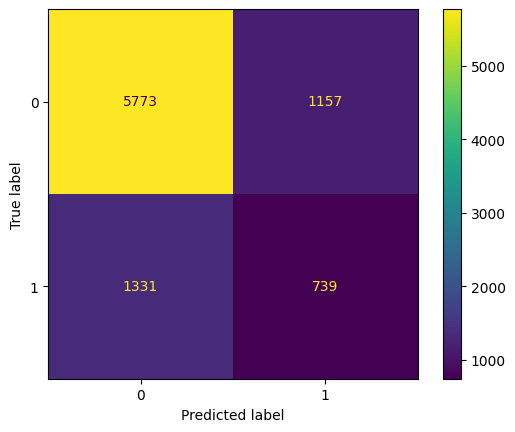

In [44]:
ConfusionMatrixDisplay(results).plot()

Evaluate and Cross-Validate

In [45]:
metrics = evaluation.evalMetrics(results)
print(f'The Accuracy of the Model: {round(metrics.accuracy(),3)}')
print(f'The Precision of the Model: {round(metrics.precision(),2)}')
print(f'The Recall of the Model: {round(metrics.recall(),2)}')
print(f'The F-Score of the Model: {round(metrics.fScore(),2)}')
print(f'The Negative Predictive Value  of the Model: {round(metrics.negativePredictiveValue(),2)}')
print(f'The Positive Predicitive Value of the Model: {round(metrics.positivePredictiveValue(),2)}')

The Accuracy of the Model: 0.724
The Precision of the Model: 0.81
The Recall of the Model: 0.83
The F-Score of the Model: 0.82
The Negative Predictive Value  of the Model: 0.39
The Positive Predicitive Value of the Model: 0.81


In [46]:
start = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=28)
cv_scores = cross_val_score(model, data_levels[selected_features], data_levels['default_payment_next_month'], scoring='accuracy', cv=cv)
end = time.time()
print(f'Cross Validation took {round(end - start, 2)} seconds and produced an average accuracy of {round(mean(cv_scores),3)}')

Cross Validation took 3.81 seconds and produced an average accuracy of 0.738


#### CV Scores, Min and Max

In [47]:
print(cv_scores)
print()
print('Max Cross Validation Score: ', max(cv_scores))
print('Min Cross Validation Score: ', min(cv_scores))

[0.73233333 0.741      0.74166667 0.734      0.74233333 0.73133333
 0.73333333 0.75166667 0.73933333 0.73133333 0.73633333 0.74
 0.74666667 0.74       0.74166667 0.73266667 0.73233333 0.73366667
 0.742      0.72333333 0.73433333 0.74133333 0.741      0.74
 0.74266667 0.737      0.738      0.74066667 0.72966667 0.74      ]

Max Cross Validation Score:  0.7516666666666667
Min Cross Validation Score:  0.7233333333333334
